# Examples for label transformations

On the Hamming Weight trace set, using the ASCAD database.

In [1]:
import numpy as np
import seaborn as sns
from tensorflow.python.keras.utils.np_utils import to_categorical

from src.tools.plotter import init_plots
from src.trace_set.database import Database
from src.trace_set.set_hw import TraceSetHW

init_plots()

In [2]:
trc = TraceSetHW(Database.ascad).open('r')

In [3]:
traces = np.array(trc["profile"]["traces"])
hw = np.array(trc["profile"]["hw"])

In [4]:
def decategorize(y):
    return np.argmax(y, axis=1).astype(bool)

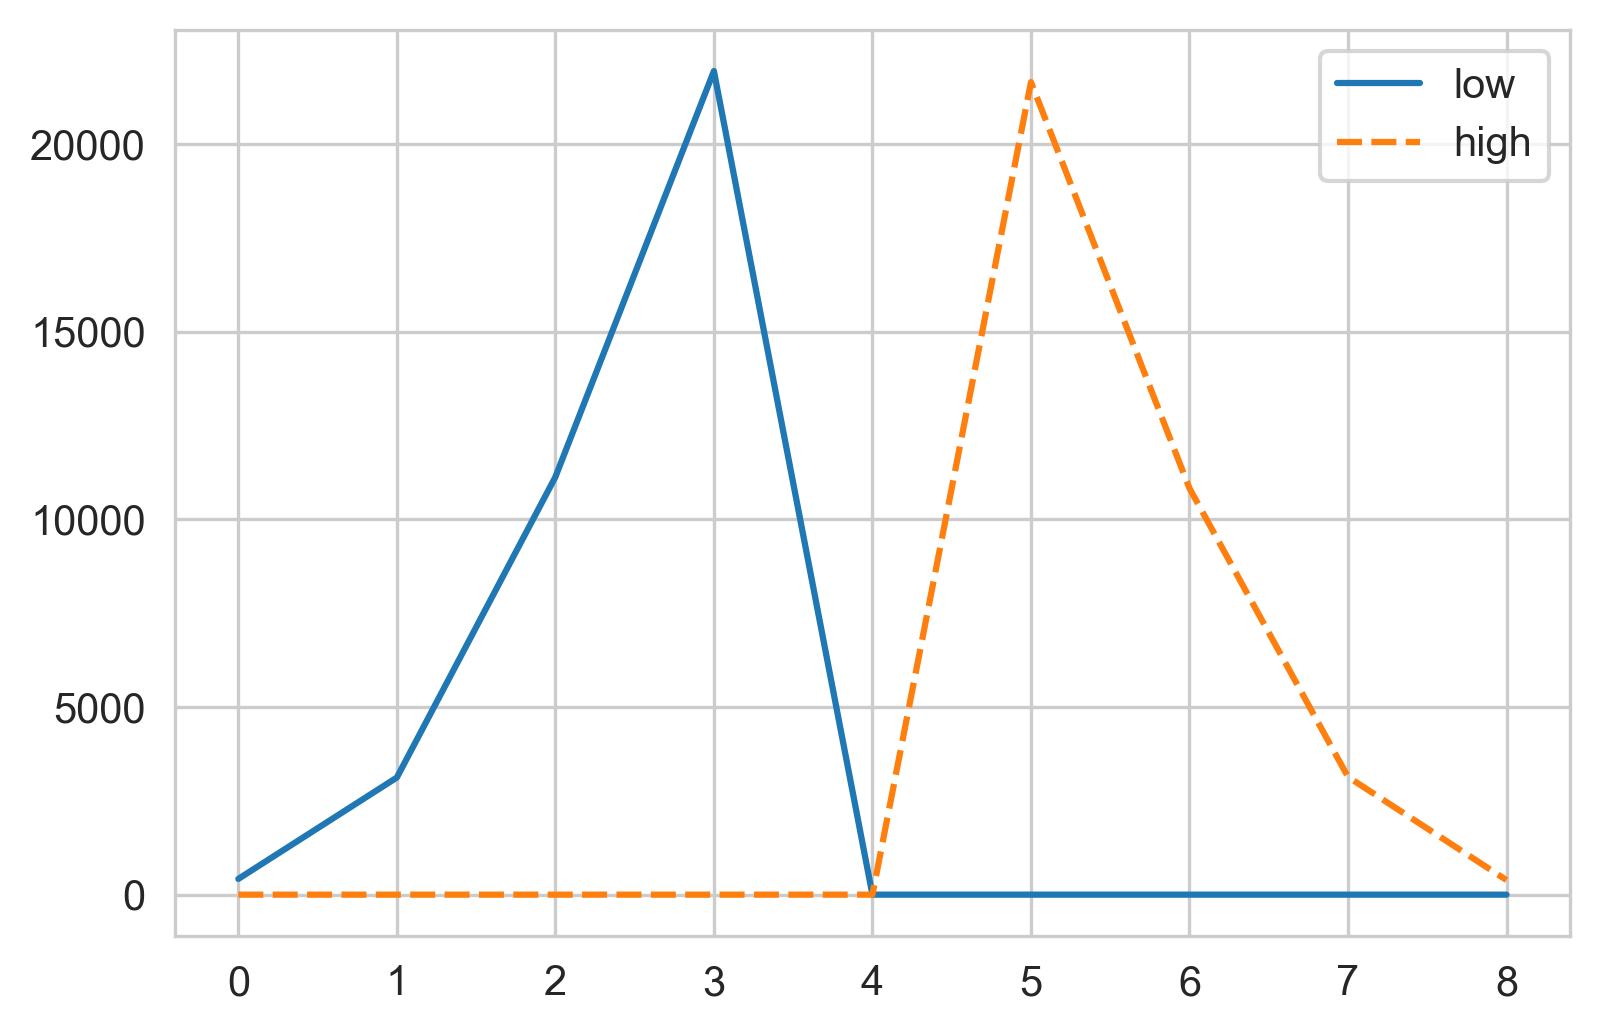

In [5]:
def reduce_fixed_fixed(x, y):
    filter_ixs = y != 4

    numerical_reduced = y[filter_ixs] > 4
    y2 = to_categorical(numerical_reduced).astype(np.int8)

    return x[filter_ixs], y[filter_ixs], y2

_, Y, Y2 = reduce_fixed_fixed(traces, hw)
IS_HIGH = decategorize(Y2)

sns.lineplot(data={
    "low": np.bincount(Y[~IS_HIGH], minlength=9),
    "high": np.bincount(Y[IS_HIGH], minlength=9),
}) and None

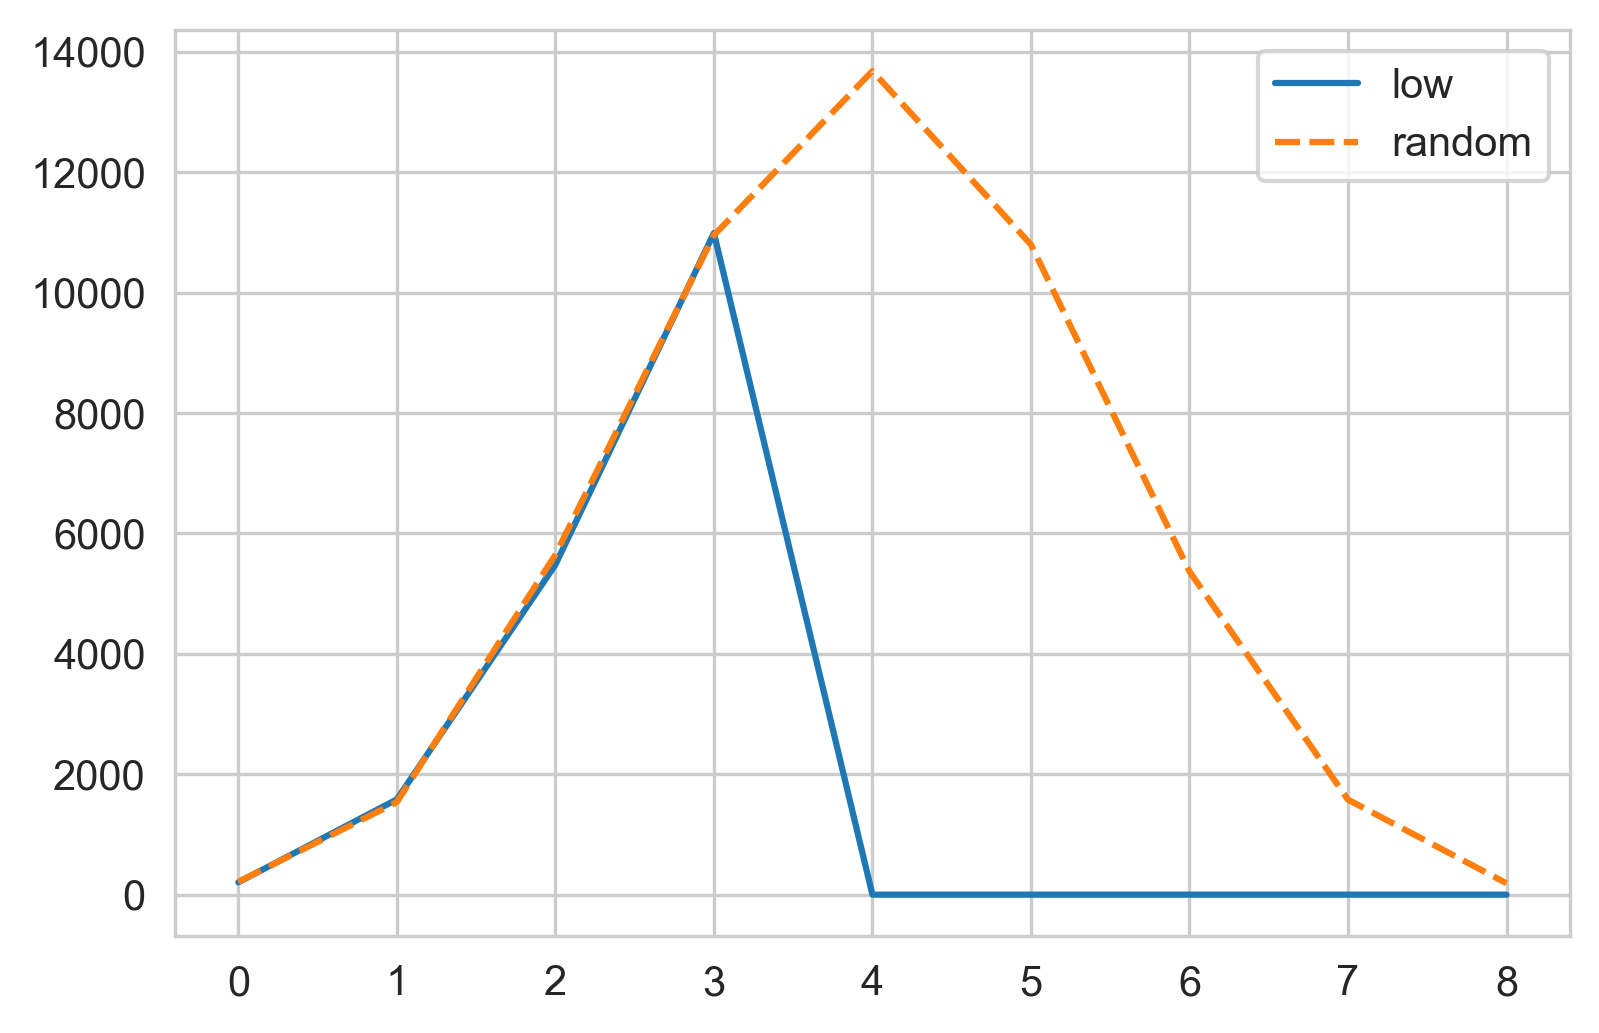

In [6]:
def reduce_fixed_random(x, y):
    is_random = np.random.binomial(1, .5, len(x)).astype(bool)
    y2 = to_categorical(is_random).astype(np.int8)

    filter_ixs = np.logical_or(y < 4, is_random)

    return x, y[filter_ixs], y2[filter_ixs]

_, Y, Y2 = reduce_fixed_random(traces, hw)
IS_RAND = decategorize(Y2)

sns.lineplot(data={
    "low": np.bincount(Y[~IS_RAND], minlength=9),
    "random": np.bincount(Y[IS_RAND], minlength=9),
}) and None

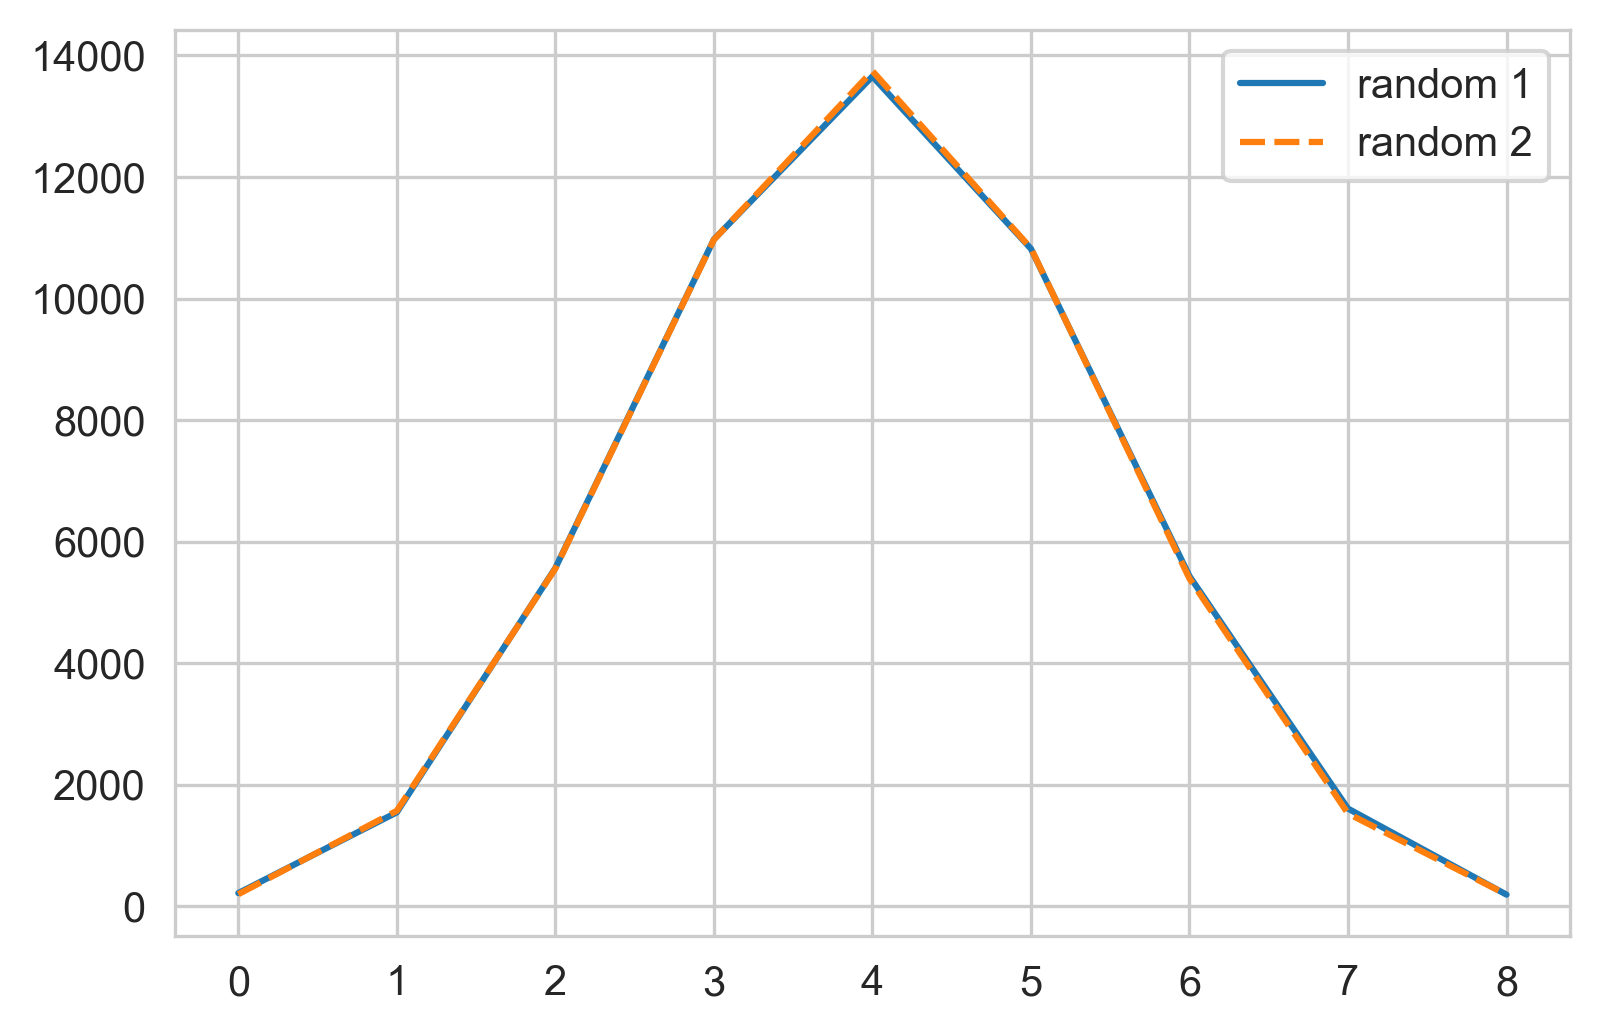

In [7]:
def reduce_random_random(x, y):
    is_random = np.random.binomial(1, .5, len(x)).astype(bool)
    y2 = to_categorical(is_random).astype(np.int8)

    return x, y, y2

_, Y, Y2 = reduce_random_random(traces, hw)
IS_RAND = decategorize(Y2)

sns.lineplot(data={
    "random 1": np.bincount(Y[~IS_RAND], minlength=9),
    "random 2": np.bincount(Y[IS_RAND], minlength=9),
}) and None

In [8]:
trc.close()